In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from datetime import datetime
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import get_single_color_func

pd.set_option('display.max_colwidth', None)

# Load Dataset

In [2]:
aspect_df = pd.read_csv("results/0ShotResult_xlm-roberta.csv")
sentiment_df = pd.read_csv("results/SentClfResult_Indo-Roberta.csv")
raw_df = pd.read_csv("data\data_preprocessed.csv")

In [3]:
# Merge Datasets
data_merge = pd.merge(aspect_df, sentiment_df, how='inner', on=['id','sequence'])

In [4]:
data = data_merge.drop(['id','sequence'], axis=1)

In [5]:
data.head()

driving range  battery life  charging time  charging infrastructure  \
0          False         False          False                    False   
1          False         False          False                    False   
2          False         False          False                    False   
3          False         False          False                     True   
4          False         False          False                    False   

   price value  incentive policy  environmental concern  look and design  \
0         True              True                  False            False   
1        False             False                  False            False   
2         True              True                  False            False   
3         True             False                  False            False   
4        False             False                  False            False   

  sentiment  
0   neutral  
1  negative  
2  positive  
3   neutral  
4   neutral

In [5]:
result = data.groupby('sentiment').sum()

In [6]:
result

driving range  battery life  charging time  \
sentiment                                               
negative              45           503            111   
neutral               74           367             38   
positive              93           324             76   

           charging infrastructure  price value  incentive policy  \
sentiment                                                           
negative                      1043         2192              3765   
neutral                       2019         2231              4133   
positive                      1055         2242              1542   

           environmental concern  look and design  
sentiment                                          
negative                    1795              118  
neutral                     1874              117  
positive                    2517              358

# Tweets Analysis

In [6]:
incentive_policy = data_merge.loc[(data_merge['incentive policy'] == True) & (data_merge['sentiment'] == 'positive')]

In [7]:
incentive_policy[['id', 'sequence','sentiment']].sample(10)

id  \
703    1618793002906062850   
20603  1660613047403298816   
22770  1658838155137544194   
1056   1617557110274883584   
12809  1636218196108931073   
6255   1626437207056846851   
5958   1626746419704135680   
21577  1659533454047051777   
14210  1633690457812373505   
16050  1631678443783077889   

                                                                                                                                                                                                                                 sequence  \
703    kalau saya interview users, ada harapan kalau semua jadi EV, jalanan jadi tidak bau knalpot, jadi bisa lebih sering jalan kaki + naik angkot. Garis bawahi harapan ya. Soal kebijakan dan actual change iya bisa beda lagi tertawa   
20603                                                                                                                                                                  Enaknya lagi pemerintah juga kasih subsidi beli kendaraan listrik.   
22770                       Setuju. Subsidi pupuk tidak perlu, bahkan kita tidak perlu swasembada pangan ya. Kan pangan kita tinggal impor. Sedangkan rakyat bisa mencukupi kebutuhan hidup sehari2 dengan mobil listrik yang disubsidi 👍   
1056                                                                                                                                                                                                                 $MMAT - 🪄 - 🚨 🚨 🚨 🚫🥄   
12809                               Gilasih. Sangt salut buat yang tiap hari melalui medan seperti gini. 🙏🙏 semangat para pejuang!!! Ntah kenapa lihat kayak begini kenapa otak saya ngaitin dengan kebijakan subsidi mobil listrik ya. 😭   
6255                                                                                                                                   Wih makin gaul saja ini PLN bisa charge kendaraan listrik di mana saja uhuy😍🤩, makin maju! Aaamiin   
5958                                         Motif subsidi kendaraan listrik salah satu (besar-nya) ini? Jual normal saja (tanpa embel-embel mobil listrik) saja sudah bisa untung, apalagi ditambah subsidi mobil listrik. Luar biasa...   
21577                                                                                                                Ni yang paling Untung sebenarnya. Beli Kereta EV macam-macam rebate dapat. T1 dilindungi oleh mana2 parti pemerintah   
14210                                                                                                                                                                          wah mantap banget... kapan punya tesla sistem yang canggih   
16050                                                                                                Alhamdulilah kayak kayaknya ada sosialisasi pakai motor listrik ..siapa tahu bakal di bagikan gratis ...anggap saja subsidi Carbon 🙏   

      sentiment  
703    positive  
20603  positive  
22770  positive  
1056   positive  
12809  positive  
6255   positive  
5958   positive  
21577  positive  
14210  positive  
16050  positive

In [8]:
price_value = data_merge.loc[data_merge['price value'] == True]

In [9]:
price_value[['sequence', 'sentiment']].sample(10)

sequence  \
19584                                                                                                                        Beli mobil listrik bisa. Giliran benerin jalan tidak bisa, ini jalanan Pekanbaru sudah tidak layak buat dilalui tiap meter ada lubang. pemerintah tolol   
17207    Merk VW asal Jerman akan bangun pabrik baterai mobil listrik di Indo untuk berbagai merk mobil seperti Audi, Porsche, Lamborgini dst. Arab, Dubai dan lain-lain yang super kayak raya kenapa tidak mau .... mungkin otak mereka belum cukup pintar. Uang bukan tanda pintar   
16651                                   Laporan itu juga yang membuat saham Tesla turun hampir 10%. Musk juga mengundang kontroversi dengan Twitter yang menghilangkan status terverifikasi dari akun yang tidak membayar dan menghilangkan tanda untuk pejabat dan akun pemerintah,   
8651                                                                                                                                                                            Dewan Protes Motor dan Mobil Listrik, Anggap Barang Mewah untuk Orang Kaya : Kok Subsidi Dari Hutang   
21405  Perbandingannya cukup jauh, dengan asumsi tarif listrik sebesar Rp1.699 per kWh, hanya diperlukan sekitar Rp2.500 untuk sepeda motor listrik menempuh jarak 50 kamu dan 10 kamu untuk mobil listrik Sedangkan, jika menggunakan BBM kamu harus menghabiskan sekitar Rp14 ribu   
19583                                                                                 Haduh pikiran orang orang ini bagaimana ya.. Jelas jelas pemerintah sekarang lagi gencar gencaran masarin produk motor listrik di kasih diskon pula, yang di beli bahkan produk luar cuakss...   
1836                                                                                                                                                                                                            Idk if i dapat afford 1 ev car lepas harga rumah pun sudah macam tu.   
23308                                                                                                                                                                        ingin banget punya mobil listrik memang nyaman dan aman dari polusi sih lagi di jalan nabung dulu sudah   
11856                                                                                                                                                                 ~ Pada saat pembelian kendaraan listrik mendapatkan layanan pemasangan 𝘩𝘰𝘮𝘦 𝘤𝘩𝘢𝘳𝘨𝘪𝘯𝘨 secara gratis dari PLN. ~   
19208                                                                                                                                    Mending duitnya dipakai untuk kasih subsidi untuk pembelian Mobil motor listrik. Mengurus memperbaiki transportasi publik tidak ada cuannya   

      sentiment  
19584  negative  
17207  negative  
16651   neutral  
8651   negative  
21405  positive  
19583  negative  
1836    neutral  
23308  positive  
11856  positive  
19208  negative

In [10]:
env_concern = data_merge.loc[data_merge['environmental concern'] == True]

In [11]:
env_concern[['sequence','sentiment']].sample(10)

sequence  \
10881                                                                                                                                                               kendaraan yang ramah lingkungan. futuristik nya bikin tinggi peminatan motor listrik . mau tahu motor listrik itu apa?   
11007                                                                                                  inovasinya sangat bagus, mengingat saat ini pencemaran udara merebak dimana mana. Dengan teroboson terkait motor listrik yang ramah lingkungan semoga dapat mengurangi polusi udara   
8862                                                                                                                                                                                                            Sama-Sama Kaya Nikel, Indonesia-Filipina Jajaki Proyek Kendaraan Listrik -   
7745                                                                                                                                                                                               pas pulang terus mau jadi apa? yang dulu bikin mobil listrik saja tidak lulus uji emisi   
19075                                               area jalan tol di jalur mudik yakni di sembilan titik di Tol Trans Jawa, dan enam titik di Tol Trans Sumatra. PLN berkomitmen untuk menyiapkan ekosistem yang mumpuni bagi pengguna electric vehicle (kendaraan listrik) di Indonesia.   
14381                                                                                                                 Pengembangan potensi kendaraan listrik di Indonesia selain untuk menekan impor BBM serta mendorong target emisi karbon juga menjadikan RI produsen kendaraan listrik   
112                                                                 NPI adalah produk smelter yang paling murah dan emisi karbon yang terlibat paling tinggi. NPI singkatan dari Nickel Pig Iron . Istilah khusus untuk nickel buatan cina. NPI untuk bisa dipakai EV harus di proses lagi   
21388       Saya juga menyampaikan harapan atas realisasi komitmen Inggris dalam Just Energy Transition Partnership, pembangunan ekosistem EV, termasuk pasokan sel baterai dan pembangunan micro factory EV, serta investasi pembangunan IKN, transportasi, energi hijau, dan pendidikan.   
11952                                                                                                                                                                                            Yu dukung ekosistem kendaraan listrik di Indonesia, dalam rangka mengurangi polusi udara.   
1652   Dgn asumsi desain kebijakan transport terutama urban yang masih lumayan favour kendaraan pribadi dibanding opsi lain, konsekuensi ke depan tanpa perubahan signifikan adalah berbagai masalah termasuk emisi, bahkan bila target adopsi kendaraan listrik secara umum terpenuhi. /4   

      sentiment  
10881  positive  
11007  positive  
8862   positive  
7745   negative  
19075   neutral  
14381   neutral  
112     neutral  
21388   neutral  
11952   neutral  
1652    neutral

In [12]:
charge_inf = data_merge.loc[data_merge['charging infrastructure'] == True]

In [13]:
charge_inf[['sequence','sentiment']].sample(10)

sequence  \
6404                                                                                                                                          wah PLN keren banget mengikuti zaman ini yang serba digital, serba canggih. Jadi tidak bingung lagi ini buat pengguna kendaraan listrik kalau kehabisan daya   
7365                                                                                                                                                     Pemerintah pusat ke Pemda "Ayo bangun LRT, BRT, MRT" tapi disaat bersamaan juga ngedorong Pemda buat pakai mobil listrik dan kasih diskon gede2an   
813                                                                                                        Orang Miskin Beli LPG bawah KTP biar Orang Kaya Gak Bisa Ikutan beli LPG 3 Kg. Orang Kaya dibantu Subsidi Mobil Listrik sama-sama bersinergi mensukseskan Program Dunia Energi Baru Terbarukan.   
11860                                                                                                                                                                                                        Setiap pembelian mobil listrik akan mendapatkan layanan home charging secara gratis oleh PLN.   
19141             Nelayan sulit jumpai ikan di laut dekat pemukiman dan daerah-daerah tempat biasa memancing. Apa penyebabnya? Industri nikel dari tambang di hulu sampai pabrik pengolahan di hilir. Di pabrik smelter milik Harita Group ini memproses nikel untuk bahan baku baterai kendaraan listrik.   
13443     Sbg negara penghasil nikel terbesar ditambah industri kendaraan listrik, gadget, dan lain-lain yang sangat berprospek ke depan, sdhkah pemerintahan Jokowi membangun produksi baterai nasional sendiri? Bkn hanya sibuk menjadi makelar yang mencari investor dari negara atau perusahaan asing.   
946                                                                                                                                                                                                                                      Produksi Baterai Mobil Listrik di Indonesia Dimulai Awal 2024 - -   
19077  Agak aneh sih, ngotot larang krl impor karena menunggu kereta pt. inka tahun 2025 karena mengejar produk dalam negeri. Tapi bisa beli mobil listrik. Dugaanku karena presiden jokowi mau promosiin bahwa indonesia layak dibikin pabrik nikel untuk bterei mobil menjaring investor. Auk ah gelap 😆   
1108                                                                                                                                                              Wah the best iya Optimalkan Nikel Indonesia, Pertamina Siap Kembangkan Ekosistem Baterai EV ini 👍🏻 maju terus upayakan yang terbaik nih.   
6473                                                                                                                         Akhirnya sekarang kalau pakai mobil listrik buat jarak jauh tidak perlu takut lagi tidak bisa mengisi daya. Kini PLN nyediain SPKLU SPBKLU yang tersebar di seluruh Indonesia   

      sentiment  
6404   positive  
7365   negative  
813    negative  
11860   neutral  
19141  positive  
13443  negative  
946     neutral  
19077  negative  
1108   positive  
6473   positive

# Time Series Analysis

In [8]:
ts = pd.merge(raw_df, data_merge, left_on='tweet_id', right_on='id')
ts = ts.drop(['tweet_id', 'author_id', 'username', 'text', 'reference_type', 'text_cleaned'], axis=1)
ts['created_at'] = pd.to_datetime(ts['created_at'], format="%Y-%m-%dT%H:%M:%S.%fZ")
ts = ts.sort_values(by='created_at', ignore_index=True)

In [9]:
ts.head()

created_at                   id  \
0 2023-01-01 00:19:45  1609343586134556674   
1 2023-01-01 01:09:52  1609356197257256961   
2 2023-01-01 02:35:23  1609377717149138944   
3 2023-01-01 03:06:22  1609385515031367682   
4 2023-01-01 03:15:26  1609387796678205443   

                                                                                                                                                                                                                                                                                   sequence  \
0                                                                                                                                                                                 Biar horangkayah pakai mobil listrik subsidi, horangmiskin bayar subsidi mereka dengan udunan naik kereta   
1                                                                                                                       Jokowi Ingin RI Raja Baterai EV, Mukhtarudin: Kita Harus Optimistis JAKARTA - Presiden Joko Widodo (Jokowi) optimistis bahwa Indonesia bisa menjadi "raja" bater...   
2                                                                                                                                                                            Logika mereka itu gini: Climate change -&gt; butuh EBT -&gt; kendaraan listrik -&gt; hilirisasi nikel bauksit.   
3  Nah ini yang sering saya pikirin. Kereta cepat habis 100 T lebih, IKN direncanakan habis 500 T, subsidi motor mobil listrik dianggarkan sekian T. Belum subsidi BBM tiap tahu habis sekian ratus T. I mean, kenapa tidak yang T T itu dipakai untuk perbaikan kualitas PDAM seIndonesia?   
4                                                                                                                                                                            mobil listrik bisa tidak iya dicharge pakai belut, lebih mudah bawa belut saja dibanding cari charging station   

   driving range  battery life  charging time  charging infrastructure  \
0          False         False          False                    False   
1          False          True          False                     True   
2          False         False          False                    False   
3          False         False          False                    False   
4          False         False          False                     True   

   price value  incentive policy  environmental concern  look and design  \
0        False              True                  False            False   
1        False             False                  False            False   
2        False             False                   True            False   
3        False              True                  False            False   
4        False             False                   True            False   

  sentiment  
0  negative  
1   neutral  
2   neutral  
3  negative  
4   neutral

In [10]:
ts_analysis = ts[['created_at', 'sentiment']]
ts_analysis.set_index('created_at', inplace=True)
ts_analysis = ts_analysis.groupby([pd.Grouper(freq='D'), 'sentiment']).size().unstack(fill_value=0)

In [17]:
# Create a line plot with custom colors for each line
fig = go.Figure()

fig.add_trace(go.Scatter(x=ts_analysis.index, y=ts_analysis['negative'], mode='lines', name='Negative', line=dict(color='red')))
fig.add_trace(go.Scatter(x=ts_analysis.index, y=ts_analysis['neutral'], mode='lines', name='Neutral', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=ts_analysis.index, y=ts_analysis['positive'], mode='lines', name='Positive', line=dict(color='green')))

# Update the layout to adjust the plot size
fig.update_layout(
    autosize=False,
    width=1200,  # Specify the width
    height=500,  # Specify the height
    margin=dict(
        l=50,  # Left margin
        r=50,  # Right margin
        b=50,  # Bottom margin
        t=30,  # Top margin
        pad=10  # Padding
    )
)

# Update the font size for specific elements
fig.update_layout(
    xaxis=dict(title="Date", title_font=dict(size=11), tickfont=dict(size=11)),
    yaxis=dict(title="Number of Tweets", title_font=dict(size=11), tickfont=dict(size=11)),
    legend=dict(font=dict(size=11))
)

# Save the figure as a high-resolution PNG image
pio.write_image(fig, "results/charts/time_series.png", width=1200, height=500, scale=2)

fig.show()

In [19]:
ts['created_at'] = ts['created_at'].dt.date
ts['created_at'] = pd.to_datetime(ts['created_at'])

In [20]:
first_peak = ts.loc[ts['created_at'].isin(['2023-01-20', '2023-01-21'])]
first_peak = first_peak.iloc[:,3:].reset_index(drop=True)
first_peak_result = first_peak.groupby('sentiment').sum()

second_peak = ts.loc[ts['created_at'] == '2023-02-17']
second_peak = second_peak.iloc[:,3:].reset_index(drop=True)
second_peak_result = second_peak.groupby('sentiment').sum()

third_peak = ts.loc[ts['created_at'].isin(['2023-03-06', '2023-03-07', '2023-03-08'])]
third_peak = third_peak.iloc[:,3:].reset_index(drop=True)
third_peak_result = third_peak.groupby('sentiment').sum()

fourth_peak = ts.loc[ts['created_at'].isin(['2023-03-17', '2023-03-19'])]
fourth_peak = fourth_peak.iloc[:,3:].reset_index(drop=True)
fourth_peak_result = fourth_peak.groupby('sentiment').sum()

fifth_peak = ts.loc[ts['created_at'] == '2023-03-28']
fifth_peak = fifth_peak.iloc[:,3:].reset_index(drop=True)
fifth_peak_result = fifth_peak.groupby('sentiment').sum()

sixth_peak = ts.loc[ts['created_at'].isin(['2023-05-17', '2023-05-18'])]
sixth_peak = sixth_peak.iloc[:,3:].reset_index(drop=True)
sixth_peak_result = sixth_peak.groupby('sentiment').sum()

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 3x2 subplot layout
fig = make_subplots(rows=3, cols=2, subplot_titles=('(a)', '(b)', '(c)', '(d)', '(e)', '(f)'), vertical_spacing=0.14)

# Create a list of dataframes
dataframes = [first_peak_result, second_peak_result, third_peak_result, fourth_peak_result, fifth_peak_result, sixth_peak_result]

# Create a list of sentiments and their corresponding colors
sentiments = [('negative', '#102D4E'), ('neutral', '#174876'), ('positive', '#3F73B0')]

# Add traces to the subplots
for i, df in enumerate(dataframes, start=1):
    row = (i-1)//2 + 1
    col = i%2 if i%2 != 0 else 2
    for sentiment, color in sentiments:
        fig.add_trace(go.Bar(name=sentiment, x=df.columns, y=df.loc[sentiment], marker_color=color, legendgroup=f'group{i}'), row=row, col=col)

fig.update_layout(legend_tracegroupgap=50)

# Change the bar mode
for i in range(1, 4):
    for j in range(1, 3):
        # Update the xaxis_tickangle
        fig.update_xaxes(tickfont=dict(size=13), categoryorder='total descending', row=i, col=j)
        fig.update_xaxes(tickangle=13, row=i, col=j)

        fig.update_xaxes(title=dict(text='Date'), title_font=dict(size=13), row=i, col=j)
        fig.update_yaxes(title=dict(text='Number of Tweets'), title_font=dict(size=13), row=i, col=j)

# # Update the layout to arrange the legend horizontally
# fig.update_layout(legend=dict(orientation="h"))

# Update the layout to adjust the plot size
fig.update_layout(
    autosize=True,
    width=1500,  # Specify the width
    height=1200,  # Specify the height
    margin=dict(
        l=50,  # Left margin
        r=50,  # Right margin
        b=30,  # Bottom margin
        t=30,  # Top margin
        pad=0  # Padding
    )
)

# Save the figure as a high-resolution PNG image
pio.write_image(fig, "results/charts/time_series_sentDist.png", width=1500, height=1200, scale=2)

# Show the plot
fig.show()

# Visualization

## Overall Sentiment

In [41]:
fig = px.pie(data, values=data['sentiment'].value_counts(), names=data['sentiment'].unique(), 
                color_discrete_sequence=px.colors.sequential.Blues_r, width=500, height=400)

# Update the layout to adjust the plot size
fig.update_layout(
    autosize=True,
    width=500,  # Specify the width
    height=400,  # Specify the height
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=0  # Padding
    )
)

# Save the figure as a high-resolution PNG image
pio.write_image(fig, "results\charts\overall_sentiment_pie_chart.png", width=500, height=400, scale=2)

fig.show()

## Aspect Sentiment Analysis

In [23]:
fig = px.pie(result, values=result.sum(), names=result.columns, color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_traces(pull=[0, 0, 0, 0, 0, 0.1, 0, 0], rotation=30)
fig.show()

In [28]:
fig = px.pie(result, values=result['incentive policy'], names=result.index, color_discrete_sequence=px.colors.sequential.Redor_r)
fig.show()

In [17]:
data

driving range  battery life  charging time  charging infrastructure  \
0              False         False          False                    False   
1              False         False          False                    False   
2              False         False          False                    False   
3              False         False          False                     True   
4              False         False          False                    False   
...              ...           ...            ...                      ...   
23724          False         False          False                    False   
23725          False         False          False                    False   
23726          False         False          False                    False   
23727          False          True          False                    False   
23728          False         False          False                    False   

       price value  incentive policy  environmental concern  look and design  \
0             True              True                  False            False   
1            False             False                  False            False   
2             True              True                  False            False   
3             True             False                  False            False   
4            False             False                  False            False   
...            ...               ...                    ...              ...   
23724        False             False                   True            False   
23725         True              True                  False            False   
23726        False             False                   True            False   
23727        False             False                   True            False   
23728        False              True                  False            False   

      sentiment  
0       neutral  
1      negative  
2      positive  
3       neutral  
4       neutral  
...         ...  
23724   neutral  
23725  negative  
23726  negative  
23727  negative  
23728  negative  

[23729 rows x 9 columns]

In [51]:
fig = go.Figure(data=[
    go.Bar(name='Negative', x=result.columns, y=result.loc['negative'], marker_color='#102D4E'),
    go.Bar(name='Neutral', x=result.columns, y=result.loc['neutral'], marker_color='#174876'),
    go.Bar(name='Positive', x=result.columns, y=result.loc['positive'], marker_color='#3F73B0')
])
# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle=10, xaxis={'categoryorder':'total descending'})

# Update the font size for specific elements
fig.update_layout(
    xaxis=dict(title="Aspect Category", title_font=dict(size=15), tickfont=dict(size=15)),
    yaxis=dict(title="Number of Tweets", title_font=dict(size=15), tickfont=dict(size=15)),
    legend=dict(font=dict(size=15))
)

# Update the layout to adjust the plot size
fig.update_layout(
    autosize=True,
    width=1500,  # Specify the width
    height=450,  # Specify the height
    margin=dict(
        l=10,  # Left margin
        r=10,  # Right margin
        b=10,  # Bottom margin
        t=10,  # Top margin
        pad=0  # Padding
    )
)

# Save the figure as a high-resolution PNG image
pio.write_image(fig, "results/charts/aspect_sentiment_bar_chart.png", scale=2)

fig.show()

## Wordcloud Analysis

In [13]:
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm.notebook import tqdm
from deep_translator import (GoogleTranslator, DeeplTranslator)

tqdm.pandas()

In [8]:
def cleaningText(text):
    text = text.replace('\n', ' ').replace('\r', '') # replace new line into space
    text = re.sub(r'(?<!\s)\.(?!\s)', ' ', text) # remove dots
    text = re.sub(r'(?<!\s)\,(?!\s)', ' ', text) # remove commas
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'#\w+','', text) # remove hash
    text = re.sub(r' +', ' ', text) # remove white space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    text = text.replace('htps','')
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

# def textTranslator(text):
#     text = GoogleTranslator(source='id', target='en').translate(text=text)
#     return text

def filteringText(text): # Remove stopwords in a text
    factory = StopWordRemoverFactory().get_stop_words()
    additional_words = ['amp','kendaraan','listrik','mobil','motor','ev','indonesia','aku','saya','kamu','kalau','jadi','sih','kok','nya','iya']
    stop_words = set(factory + additional_words)
    text = text.split()
    filtered_text = [word for word in text if word not in stop_words]
    return " ".join(filtered_text)

# Pipeline
def preprocessing(text):
  text = cleaningText(text)
  text = casefoldingText(text)
#   text = textTranslator(text)
  text = filteringText(text)
  return text

In [9]:
sentiment_df['text_cleaned'] = sentiment_df['sequence'].progress_apply(preprocessing)

  0%|          | 0/23729 [00:00<?, ?it/s]

### Sentiment Wordcloud

In [10]:
neg_sent = sentiment_df[sentiment_df['sentiment']=='negative']
pos_sent = sentiment_df[sentiment_df['sentiment']=='positive']
neu_sent = sentiment_df[sentiment_df['sentiment']=='neutral']

In [11]:
neg_words = ''
for wordlist in neg_sent['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    neg_words += " ".join(tokens)+" "

pos_words = ''
for wordlist in pos_sent['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    pos_words += " ".join(tokens)+" "

neu_words = ''
for wordlist in neu_sent['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    neu_words += " ".join(tokens)+" "

In [22]:
# Create the word vector with unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform([pos_words])
freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]) 

In [23]:
# Sort by frequency
freq = sorted(freq, key=lambda x: -x[1])

In [34]:
import argostranslate.package
import argostranslate.translate

from_code = "id"
to_code = "en"

available_packages = argostranslate.package.get_available_packages()
package_to_install = next(
    filter(
        lambda x: x.from_code == from_code and x.to_code == to_code, available_packages
    )
)
argostranslate.package.install_from_path(package_to_install.download())

top100 = freq[:100]

# Translate the words from Bahasa Indonesia to English
top100 = [(argostranslate.translate.translate(word, from_code, to_code), freq) for word, freq in top100]

(ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None),)
(ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None),)
(ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None),)
(ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None),)


Exception: Download failed for Indonesian → English

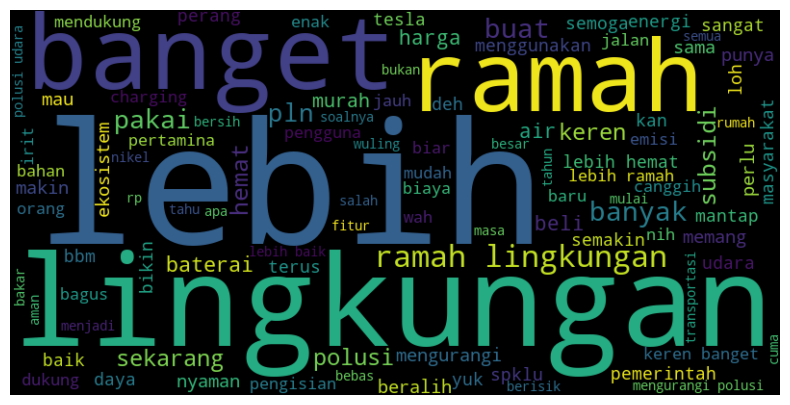

In [24]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(dict(freq[:100]))

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

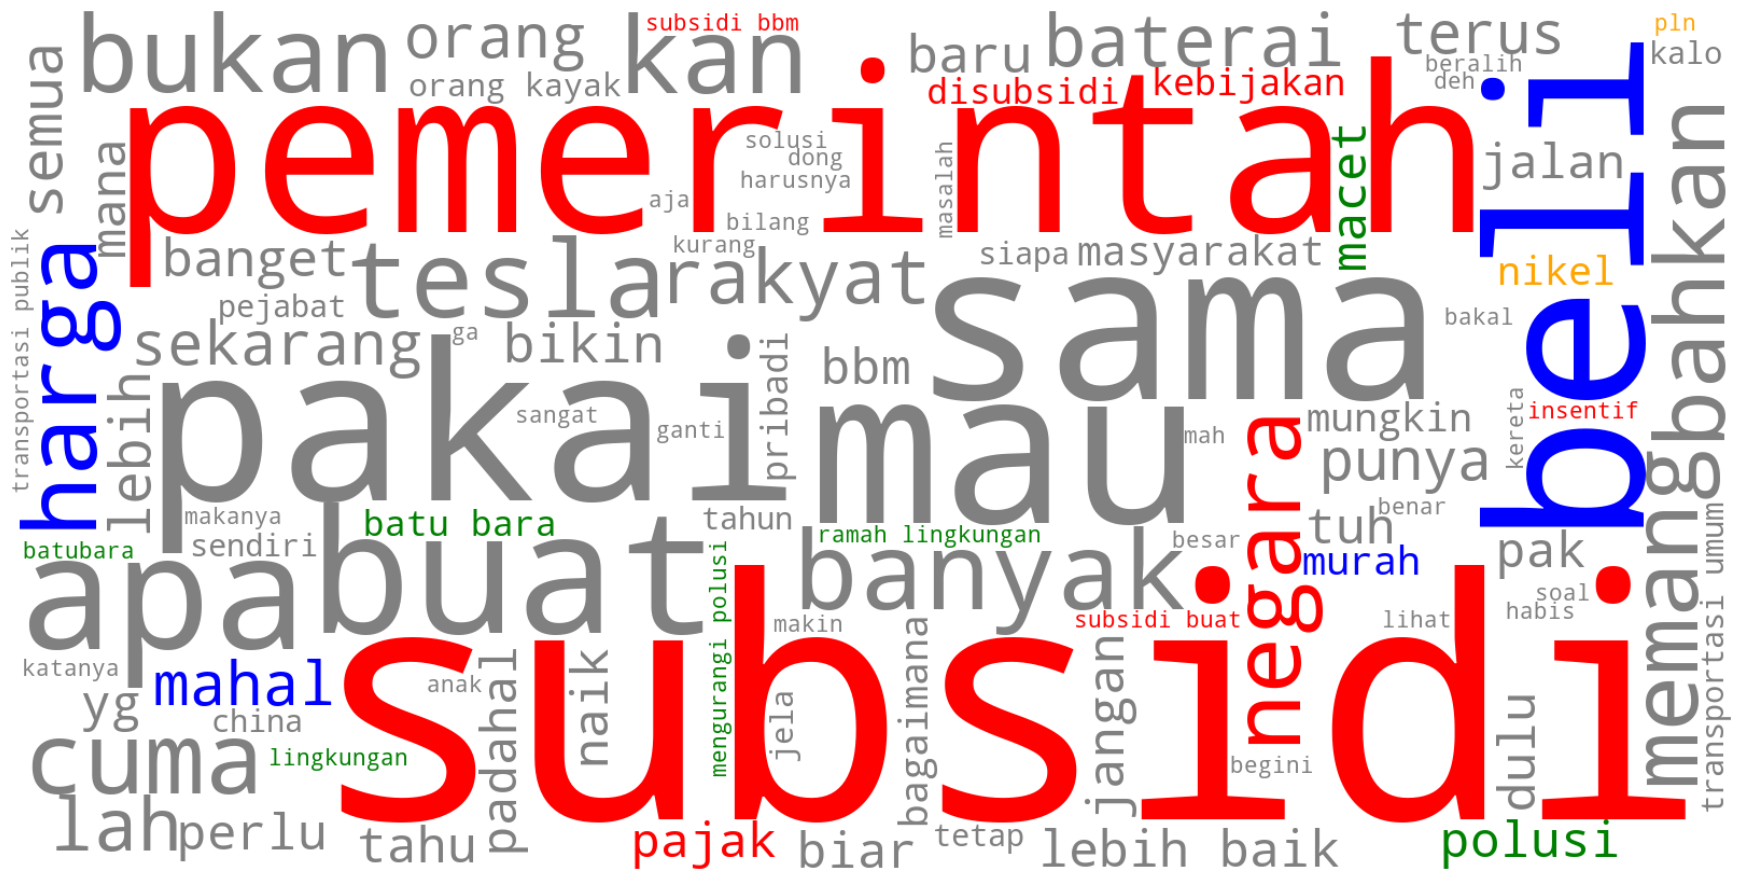

In [63]:
#Negative
wordcloud = WordCloud(max_words=100, width=1600, height=800, background_color='white').generate(neg_words)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

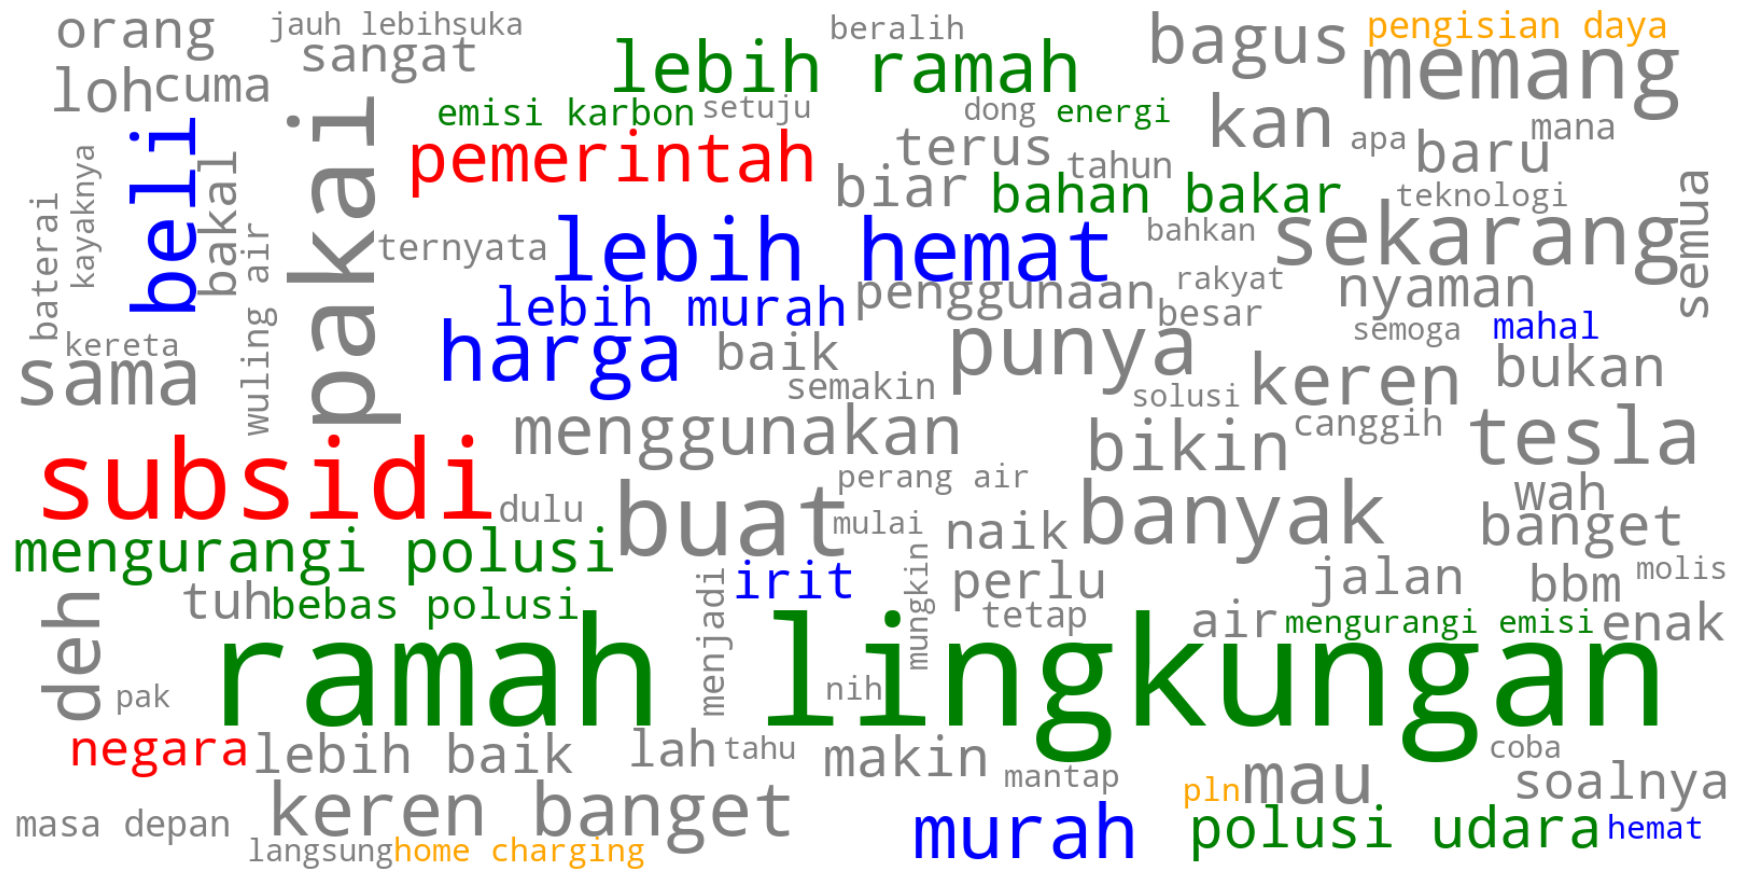

In [64]:
#Positive
wordcloud = WordCloud(max_words=100, width=1600, height=800, color_func=color_func, background_color='white').generate(pos_words)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

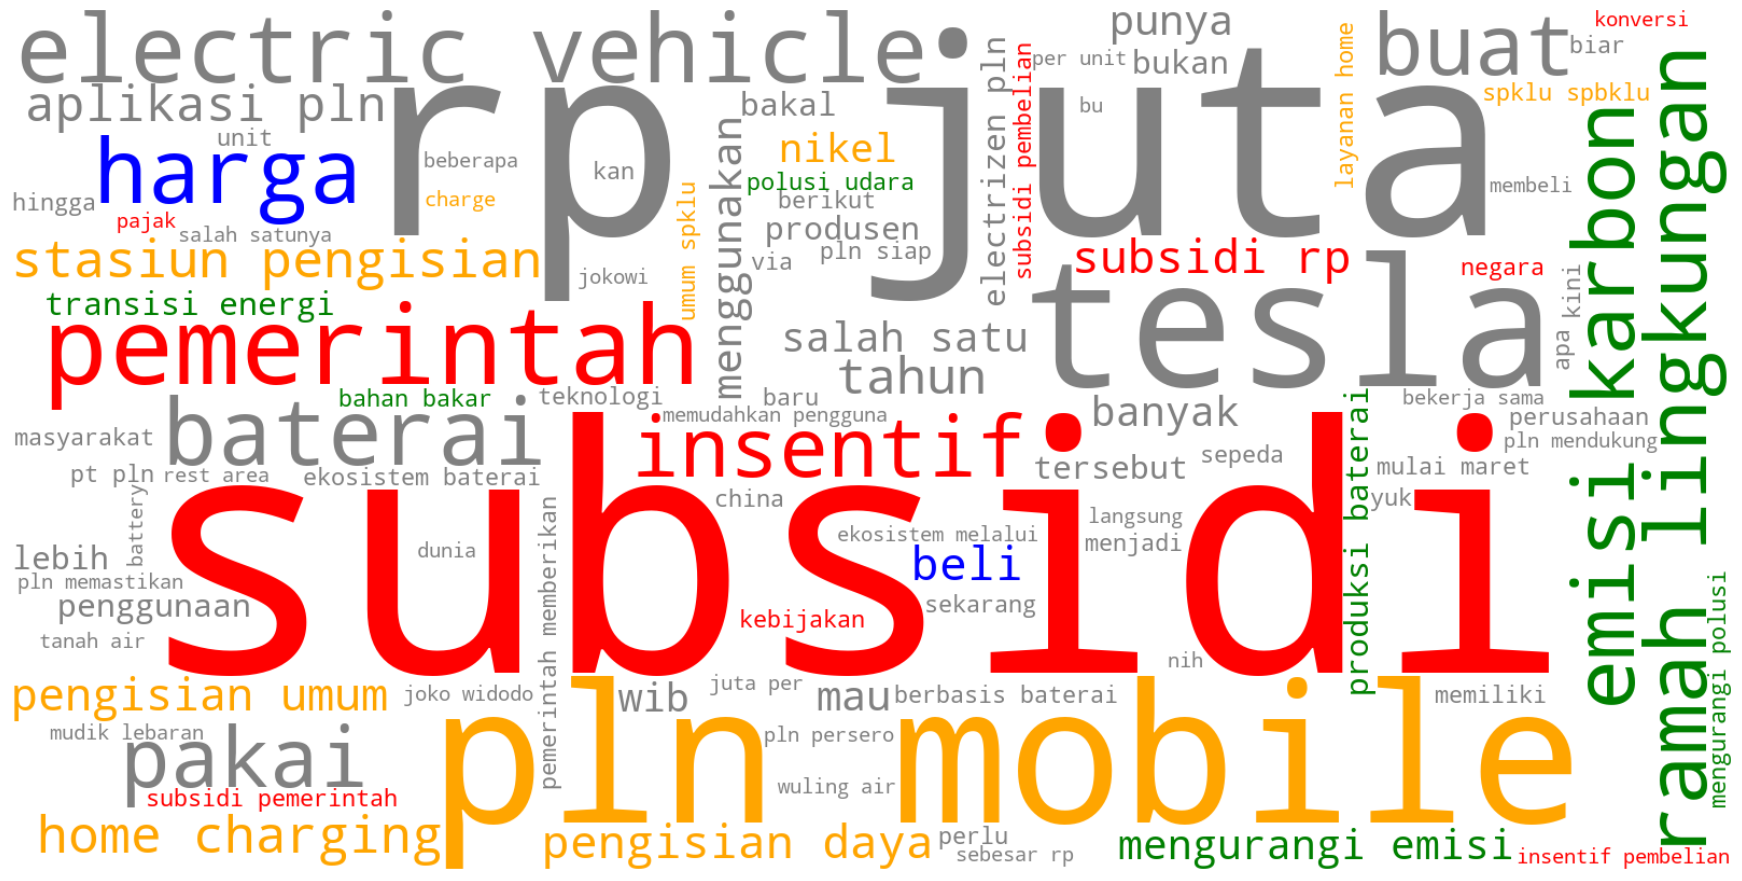

In [65]:
#Neutral
wordcloud = WordCloud(max_words=100, width=1600, height=800, color_func=color_func, background_color='white').generate(neu_words)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

### Aspect Wordcloud

In [44]:
aspect_df['text_cleaned'] = aspect_df['sequence'].progress_apply(preprocessing)

  0%|          | 0/23729 [00:00<?, ?it/s]

In [45]:
driving_range = aspect_df[aspect_df['driving range'] == True]
battery_life = aspect_df[aspect_df['battery life'] == True]
charging_time = aspect_df[aspect_df['charging time'] == True]
charging_infrastructure = aspect_df[aspect_df['charging infrastructure'] == True]
price_value = aspect_df[aspect_df['price value'] == True]
incentive_policy = aspect_df[aspect_df['incentive policy'] == True]
environmental_concern = aspect_df[aspect_df['environmental concern'] == True]
look_and_design = aspect_df[aspect_df['look and design'] == True]

In [46]:
driving_range_words = ''
for wordlist in driving_range['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    driving_range_words += " ".join(tokens)+" "

battery_life_words = ''
for wordlist in battery_life['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    battery_life_words += " ".join(tokens)+" "

charging_time_words = ''
for wordlist in charging_time['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    charging_time_words += " ".join(tokens)+" "

charging_infrastructure_words = ''
for wordlist in charging_infrastructure['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    charging_infrastructure_words += " ".join(tokens)+" "

price_value_words = ''
for wordlist in price_value['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    price_value_words += " ".join(tokens)+" "

incentive_policy_words = ''
for wordlist in incentive_policy['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    incentive_policy_words += " ".join(tokens)+" "

environmental_concern_words = ''
for wordlist in environmental_concern['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    environmental_concern_words += " ".join(tokens)+" "

look_and_design_words = ''
for wordlist in look_and_design['text_cleaned']:
    wordlist = str(wordlist)
    tokens = wordlist.split()
    look_and_design_words += " ".join(tokens)+" "

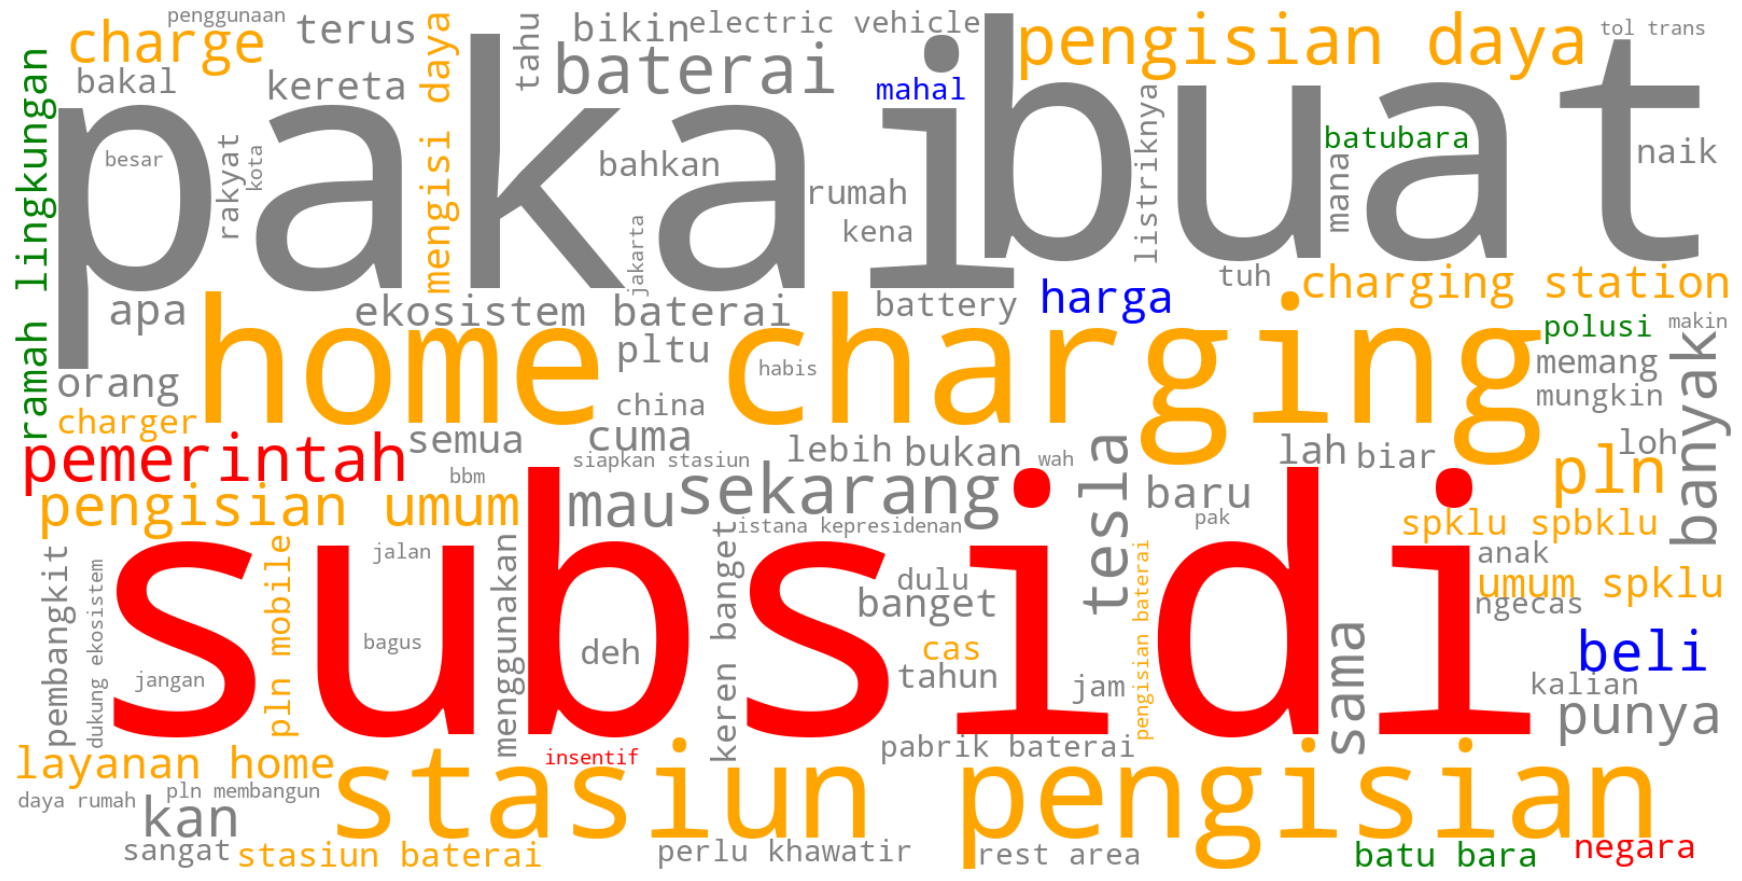

In [66]:
#charging infrastructure
wordcloud = WordCloud(max_words=100, width=1600, height=800, color_func=color_func, background_color='white').generate(charging_infrastructure_words)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

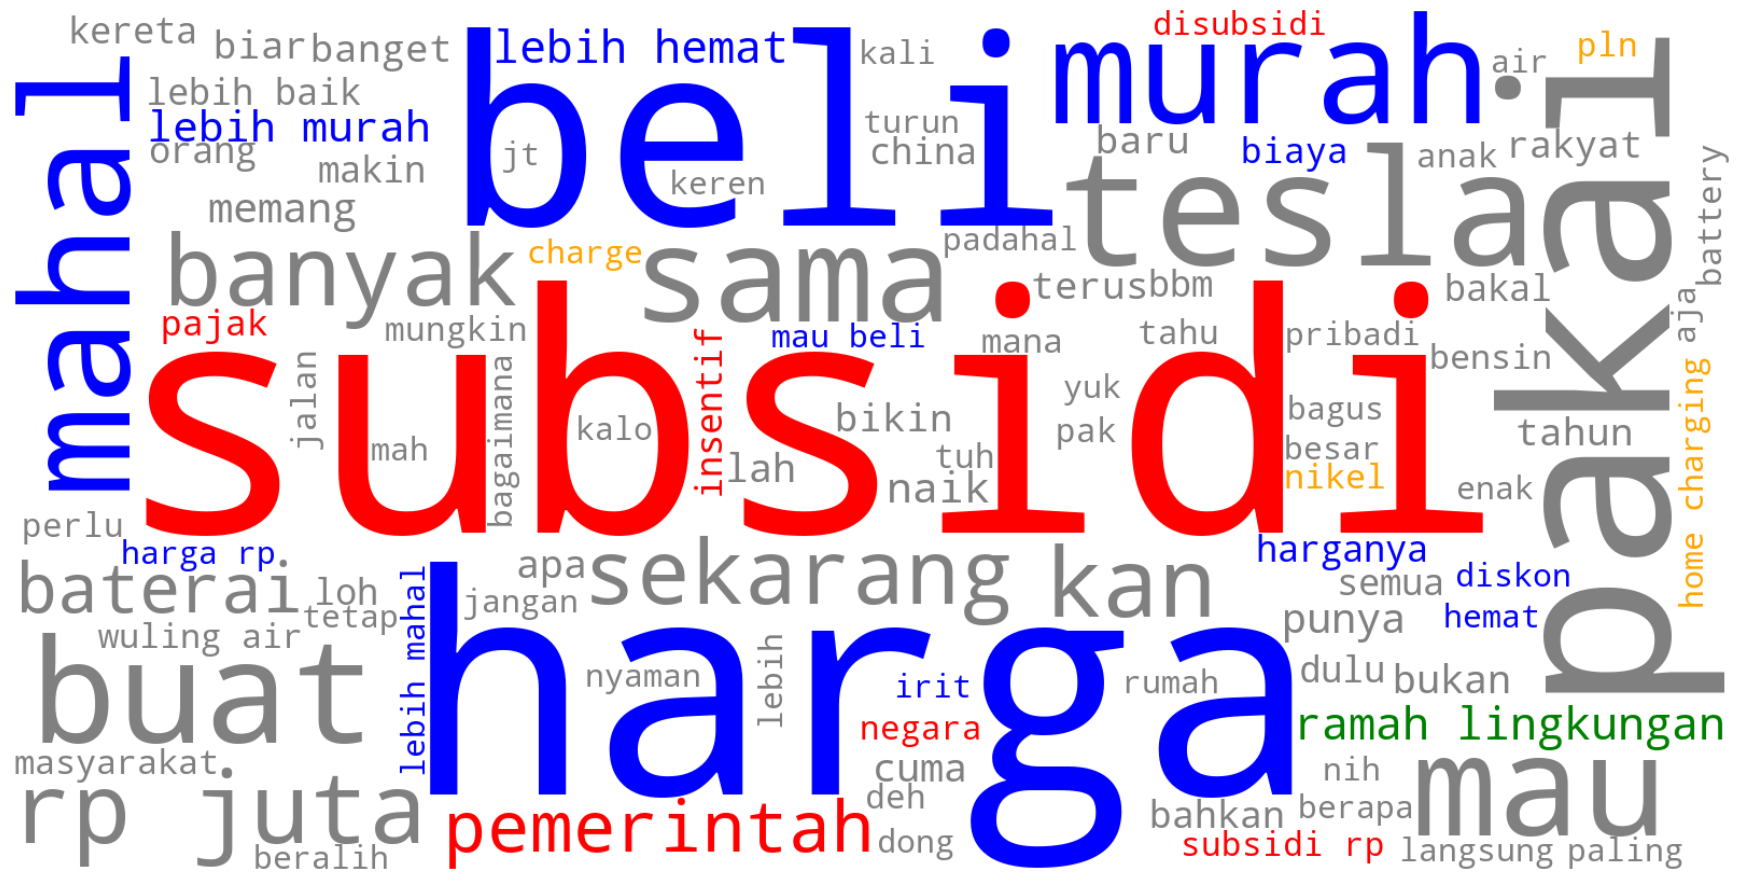

In [67]:
#price value
wordcloud = WordCloud(max_words=100, width=1600, height=800, color_func=color_func, background_color='white').generate(price_value_words)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

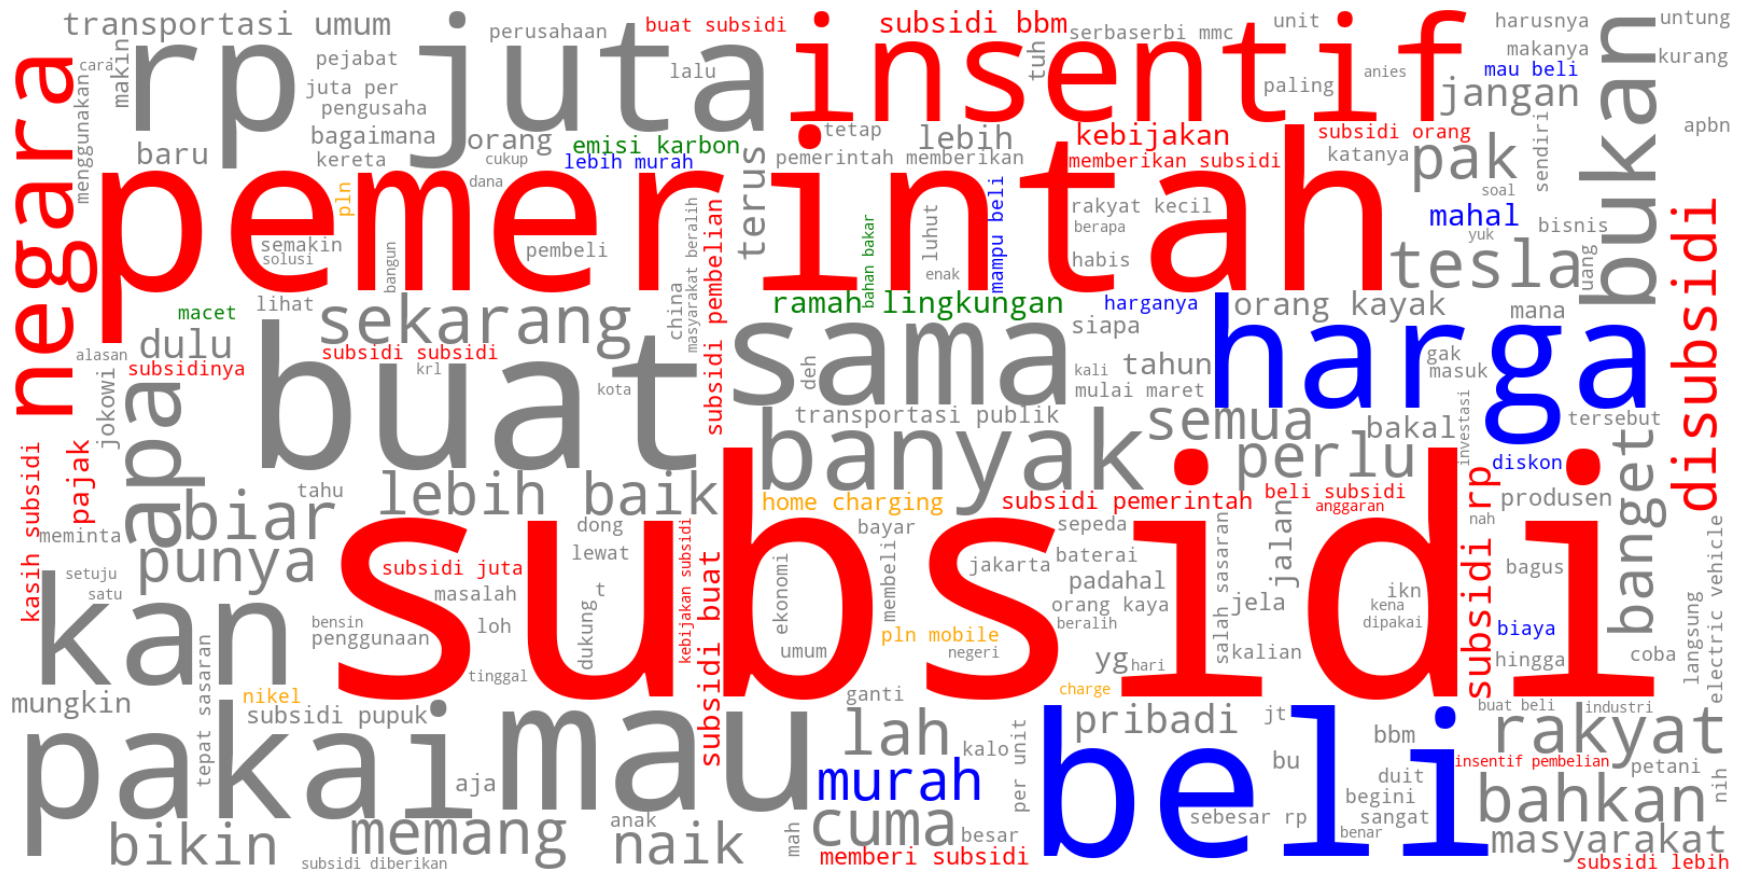

In [68]:
#incentive policy
wordcloud = WordCloud(width=1600, height=800, color_func=color_func, background_color='white').generate(incentive_policy_words)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

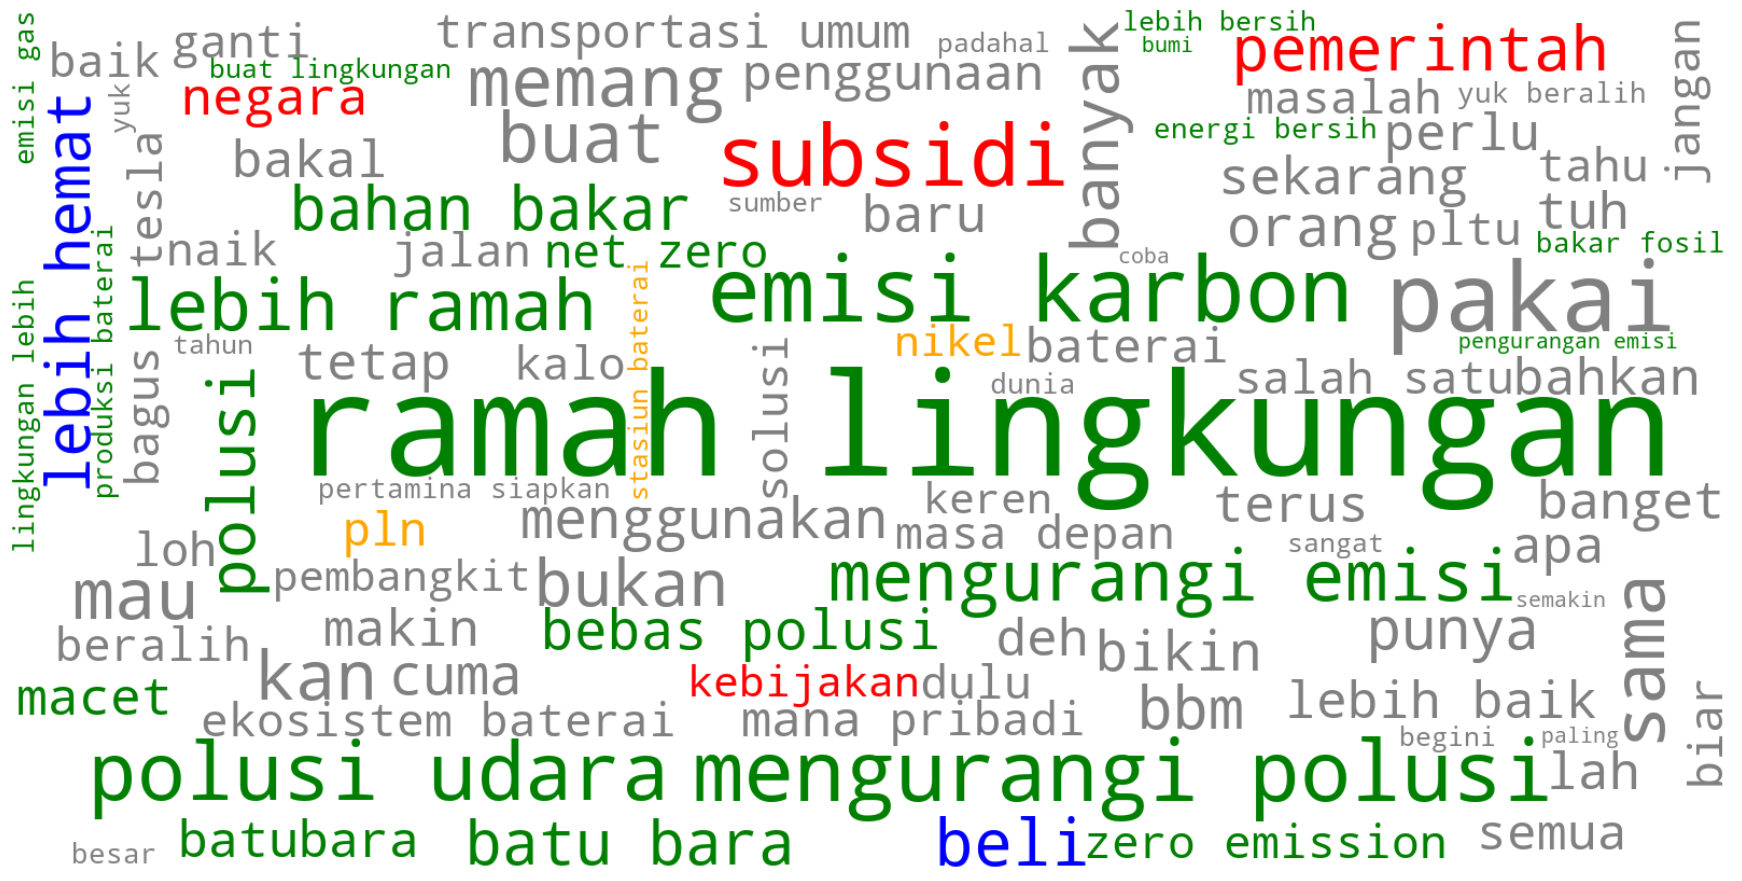

In [69]:
#environmental concern
wordcloud = WordCloud(max_words=100, width=1600, color_func=color_func, height=800, background_color='white').generate(environmental_concern_words)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=5)
plt.show()